In [2]:
import numpy as np 
import pandas as pd 
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from subprocess import check_output

In [3]:
df_events = pd.read_csv("Dataset/events.csv")
df_ginf = pd.read_csv("dataset/ginf.csv")
## Seleccionar solo las funciones que necesito. `id_odsp` sirve como un identificador único que se utilizará para
## unión de los 2 conjuntos de datos
df_ginf = df_ginf[['id_odsp' , 'date' , 'league' , 'season' , 'country']]

#unir los 2 dataset
df_events = df_events.merge(df_ginf, how='left')

df_edad_jugadores = pd.read_csv("Dataset/edad_jugadores.csv" , delimiter=",")

In [7]:
df_events.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break',
       'date', 'league', 'season', 'country'],
      dtype='object')

In [30]:
#Evento de intento - donde no fue gol y tiro al arco
df_shot_places = df_events[(df_events['event_type'] == 1) & 
                           (df_events['is_goal'] == 0)]['shot_outcome'].value_counts()
print(df_shot_places)

2.0    92827
1.0    54198
3.0    54082
4.0     3575
Name: shot_outcome, dtype: int64


In [54]:
#Evento de intento - donde fue gol y agrupado por minutos en el que se hizo y el equpo es el Barca
df_shot_places = df_events[(df_events['event_type'] == 1) & 
                           (df_events['is_goal'] == 1) & (df_events['event_team'] == 'Barcelona')]['time'].value_counts()
print(df_shot_places.head(15))

90    28
25    12
53    12
56    11
79    10
74    10
59     9
64     9
45     9
72     9
43     9
68     9
77     9
22     9
40     9
Name: time, dtype: int64


In [37]:
def datos_jugador(nombre):
    edad = df_edad_jugadores[(df_edad_jugadores['jugador'] == nombre)]['edad']
    edad = [a for a in edad]
    fecha_nacimiento = df_edad_jugadores[(df_edad_jugadores['jugador'] == nombre)]['fecha_nacimiento']
    fecha_nacimiento = [a for a in fecha_nacimiento]
    
    goles = df_events[(df_events['is_goal'] == 1) & 
                           (df_events['player'] == nombre)]['is_goal'].sum()
    asistencia_gol = df_events[(df_events['is_goal'] == 1) & 
                           (df_events['player2'] == 'julian schuster')]['is_goal'].sum()
    amarilla = df_events[(df_events['event_type'] == 4) & 
                           (df_events['player'] == nombre)]['event_type'].sum()
    segunda_amarilla = df_events[(df_events['event_type'] == 5) & 
                           (df_events['player'] == nombre)]['event_type'].sum()
    tarjetas_rojas = df_events[(df_events['event_type'] == 6) & 
                           (df_events['player'] == nombre)]['event_type'].sum()
    
    
    users = {nombre: [edad[0] , fecha_nacimiento[0] ,  goles ,'algo 1' , asistencia_gol , amarilla , segunda_amarilla , tarjetas_rojas]}
    df = pd.DataFrame(users, index=['edad ', 'fecha de nacimiento' , 'cantidad de goles' , 'Equipo donde juega' , 'Asistencia' , 'primera amarilla' , 'segunda amarilla' , 'Tarjeta roja'])
    return df

<img src=>

In [38]:
datos_jugador("robert lewandowski")

,robert lewandowski
edad,34 años
fecha de nacimiento,21 de agosto de 1988
cantidad de goles,124
Equipo donde juega,algo 1
Asistencia,8
primera amarilla,48
segunda amarilla,0
Tarjeta roja,6


In [41]:
datos_jugador("cesar")

,cesar
edad,54 años
fecha de nacimiento,31 de marzo de 1968
cantidad de goles,0
Equipo donde juega,algo 1
Asistencia,8
primera amarilla,4
segunda amarilla,0
Tarjeta roja,6


In [72]:
equipo = df_events[(df_events['player'] == 'felipe santana')][['event_team', 'season']].value_counts()
print(equipo)

event_team                season
Borussia Dortmund         2012      39
                          2013      38
Schalke 04                2014      30
                          2015       7
                          2012       4
VfL Wolfsburg             2013       4
Bayer Leverkusen          2013       3
VfL Wolfsburg             2015       3
Borussia Monchengladbach  2014       3
Fortuna Dusseldorf        2013       2
SC Freiburg               2014       2
VfL Wolfsburg             2014       2
Borussia Monchengladbach  2012       2
VfB Stuttgart             2013       2
TSG Hoffenheim            2012       2
SC Paderborn              2015       2
Nurnberg                  2014       2
Bayer Leverkusen          2014       2
Kaiserslautern            2012       2
Hannover 96               2013       2
Nurnberg                  2013       2
SC Freiburg               2012       1
Hamburg SV                2012       1
FC Augsburg               2014       1
                          2012 

In [40]:
datos_jugador("felipe santana")

,felipe santana
edad,36 años
fecha de nacimiento,17 de marzo de 1986
cantidad de goles,5
Equipo donde juega,algo 1
Asistencia,8
primera amarilla,24
segunda amarilla,0
Tarjeta roja,0


In [42]:

pie_dominante = df_events[(df_events['player'] == 'felipe santana')]['bodypart'].value_counts()
verdad = pie_dominante.index == 3.0
print(pie_dominante)
if verdad[0] == True:
    pie = pie_dominante[1]
else:
    pie = 
    

SyntaxError: invalid syntax (2794366664.py, line 7)

In [36]:
df_edad_jugadores.columns

#print(df_edad_jugadores.isnull().sum()) # hay 329 registro nulos

#edad = df_edad_jugadores['edad'].head(1)
#print(edad)
#print(edad + " esta es la edad de " + "felipe santana")

fecha_nacimiento = df_edad_jugadores[(df_edad_jugadores['jugador'] == ("felipe santana"))]['fecha_nacimiento']
fecha_nacimiento = [a for a in fecha_nacimiento]
print(fecha_nacimiento[0])

17 de marzo de 1986


In [180]:
fecha_nacimiento = df_edad_jugadores['edad'][df_edad_jugadores.jugador == "felipe santana"].index
print(fecha_nacimiento)
algo = df_edad_jugadores['edad'][fecha_nacimiento]
print("esta noche es " + algo)

Int64Index([17], dtype='int64')
17    esta noche es 36 años
Name: edad, dtype: object


In [141]:
# Penalties
penalties=df_events[df_events["location"]==14]
#print(penalties)

player_pen=penalties[penalties["player"]=="lionel messi"]
scored_pen=player_pen[player_pen["is_goal"]==1]
missed_pen=player_pen[player_pen["is_goal"]==0]
    
top_left_rightfoot=scored_pen[scored_pen["shot_place"]==12][scored_pen["bodypart"]==2].shape[0]
#print(player_pen)
#print(scored_pen)
#print(missed_pen)
print(top_left_rightfoot)

3


In [48]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [49]:
missing_values_table(df_edad_jugadores)

Your selected dataframe has 3 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
edad,329,5.4
fecha_nacimiento,329,5.4


In [50]:
df_edad_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edad              5789 non-null   object
 1   fecha_nacimiento  5789 non-null   object
 2   jugador           6118 non-null   object
dtypes: object(3)
memory usage: 143.5+ KB


In [52]:
# Completa los null con 'Sin registro'
df_edad_jugadores.edad.fillna('Sin registro', inplace= True)
df_edad_jugadores.fecha_nacimiento.fillna('Sin registro', inplace= True)

In [53]:
df_edad_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edad              6118 non-null   object
 1   fecha_nacimiento  6118 non-null   object
 2   jugador           6118 non-null   object
dtypes: object(3)
memory usage: 143.5+ KB


In [44]:
# Get the yellow cards data

first_yellow_cards = df_events [df_events ['event_type'] == (4)] # select first yellow cards
second_yellow_cards= df_events [df_events ['event_type'] == (5)] # select second yellow cards
red_cards = df_events [df_events['event_type'] == (6)] # select red cards
yellow_cards= df_events [df_events ['event_type'] == (4 or 5)]

card_frames = [red_cards, yellow_cards]
all_cards = pd.concat(card_frames)

Text(0.5, 1.0, 'When Red Cards Occur')

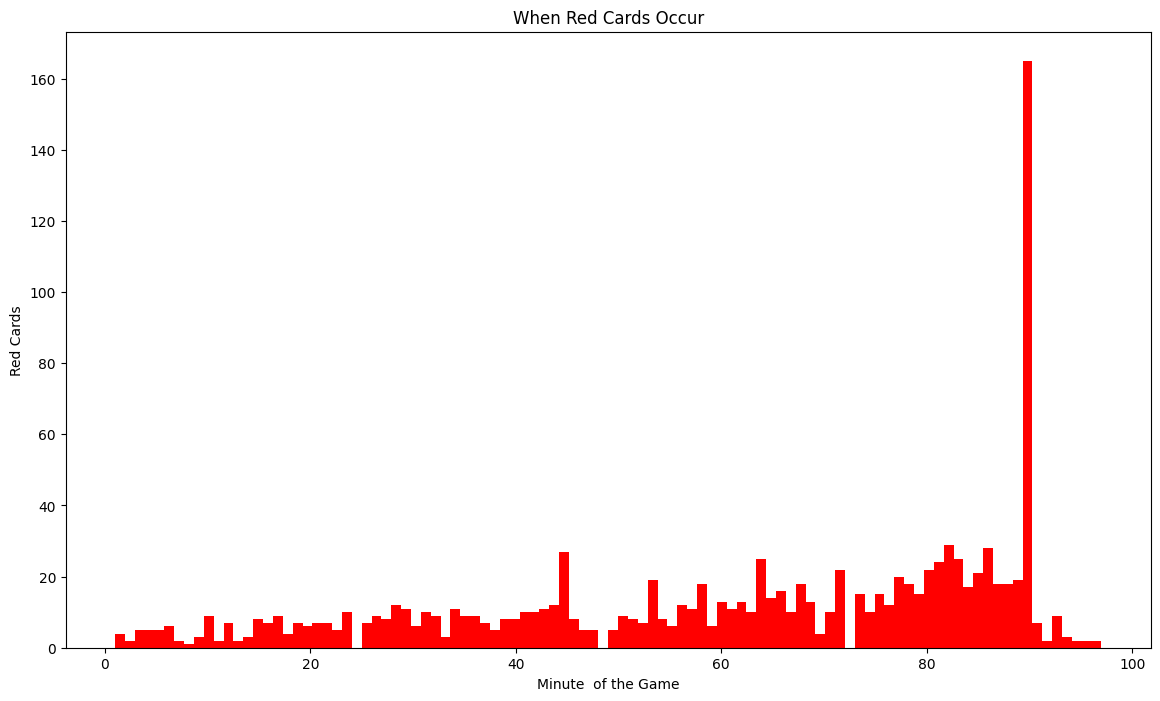

In [56]:
# Get the yellow cards against time of playing the game
fig = plt.figure(figsize=(14,8))
plt.hist(red_cards.time, 100, color="red")
plt.xlabel("Minute  of the Game")
plt.ylabel("Red Cards")
plt.title("When Red Cards Occur")

Text(0.5, 1.0, 'When First Yellow Cards Occur')

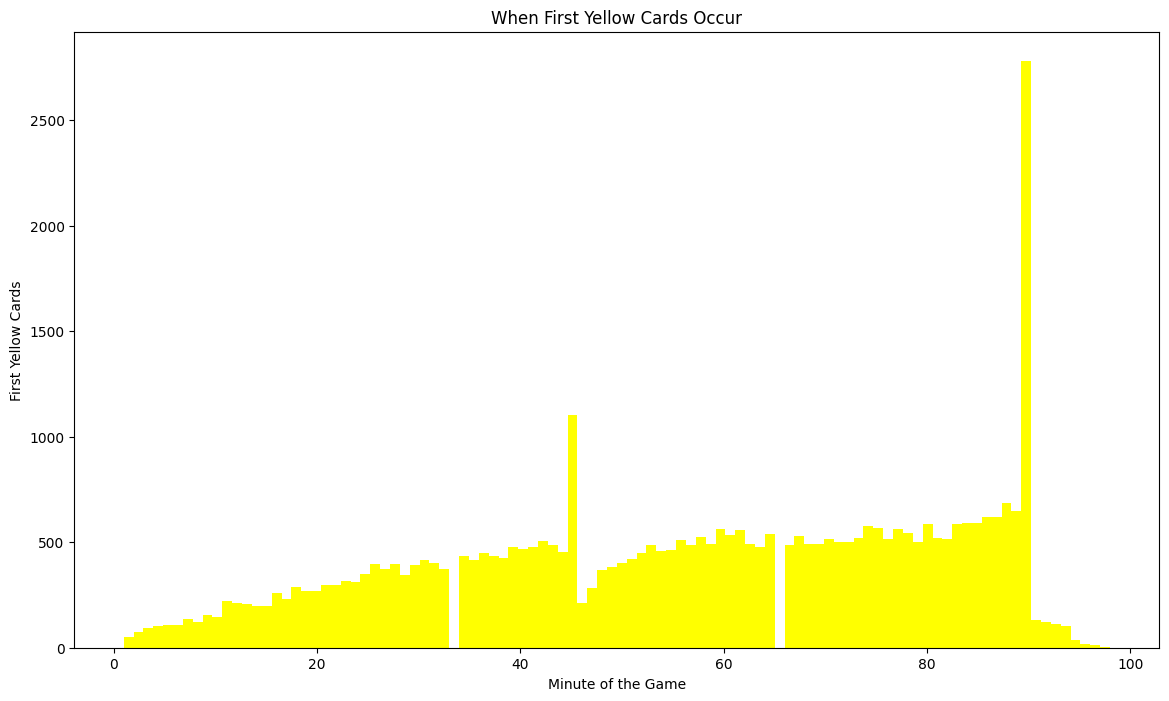

In [57]:
# plot the second yellow cards against time of playing the game

fig2 = plt.figure(figsize=(14,8))
plt.hist(first_yellow_cards.time, 100, color="yellow")
plt.xlabel("Minute of the Game")
plt.ylabel("First Yellow Cards")
plt.title("When First Yellow Cards Occur")

Text(0.5, 1.0, 'When Second Yellow Cards Occur')

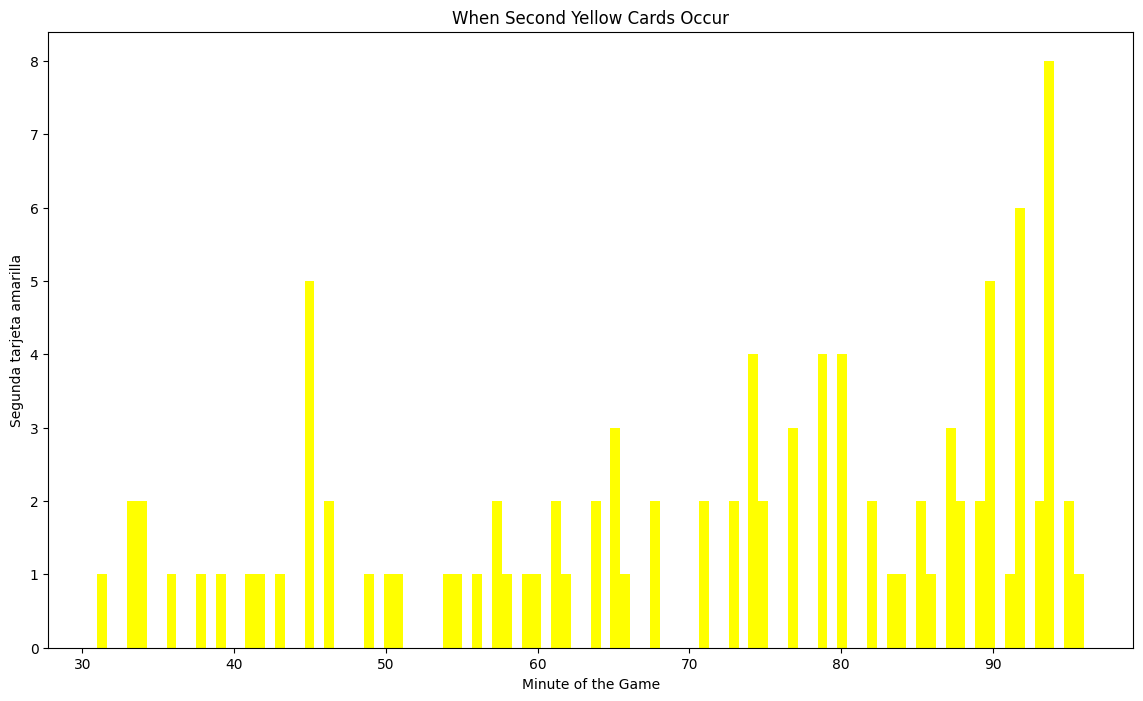

In [45]:
# plot the red cards against time of playing the game

fig3 = plt.figure(figsize=(14,8))
plt.hist(second_yellow_cards.time, 100, color="yellow")
plt.xlabel("Minute of the Game")
plt.ylabel("Segunda tarjeta amarilla")
plt.title("When Second Yellow Cards Occur")

Text(0.5, 1.0, 'When cards are served')

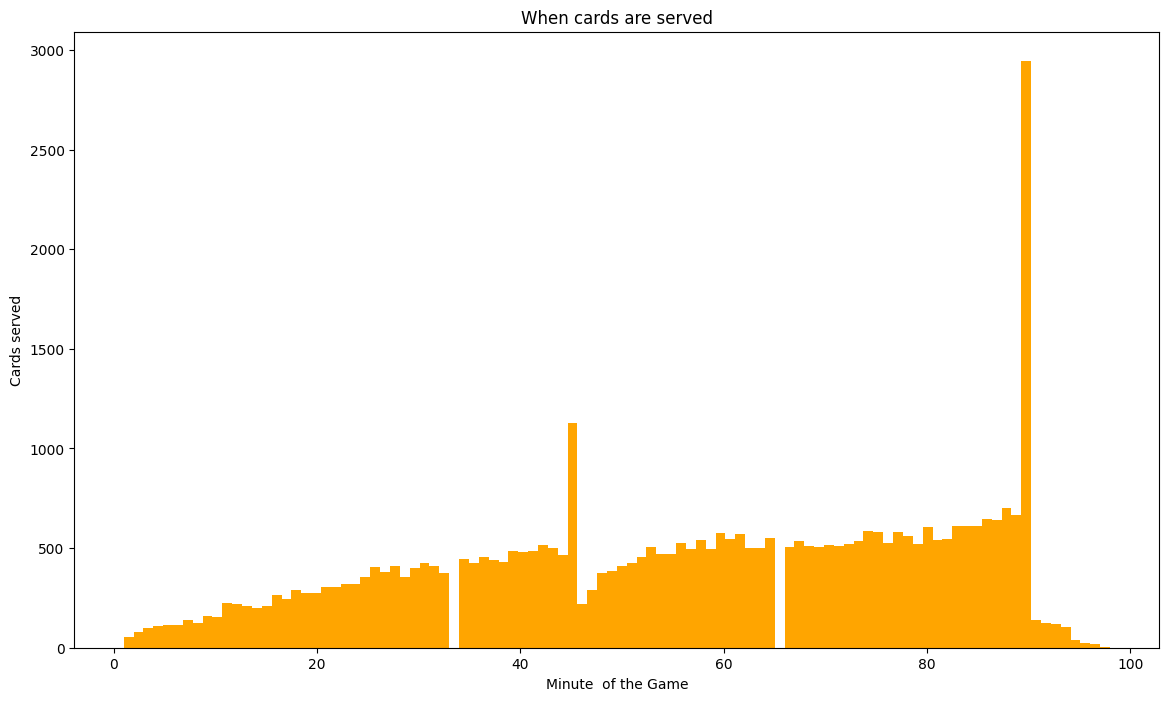

In [59]:
# Get the yellow cards against time of playing the game
fig4 = plt.figure(figsize=(14,8))                                                            
plt.hist(all_cards.time, 100, color="orange")
plt.xlabel("Minute  of the Game")
plt.ylabel("Cards served")
plt.title("When cards are served")

<AxesSubplot: xlabel='event_type'>

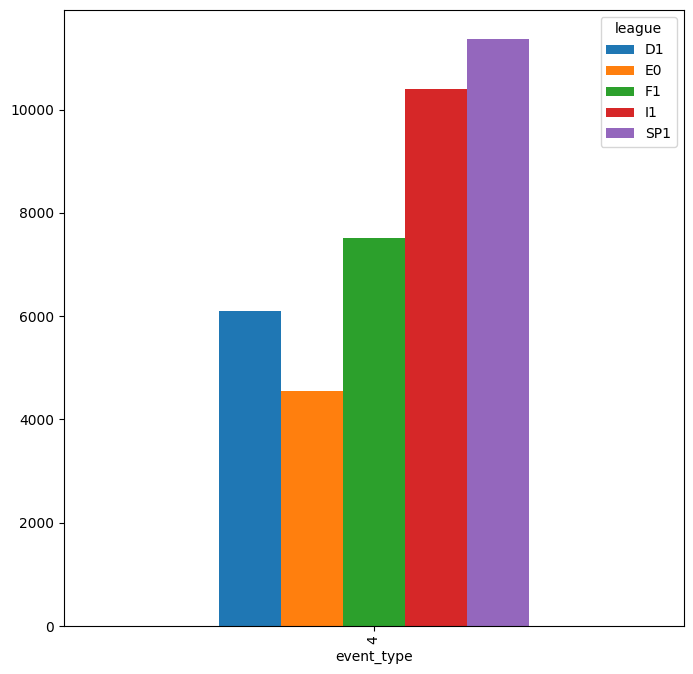

In [61]:
yellow_league = pd.crosstab(index=yellow_cards.event_type, columns=yellow_cards.league)
yellow_league.plot(kind='bar', figsize=(8,8))

## Cuando es más probable que marquen gol?

Text(0.5, 1.0, 'Number of goals against Time during match')

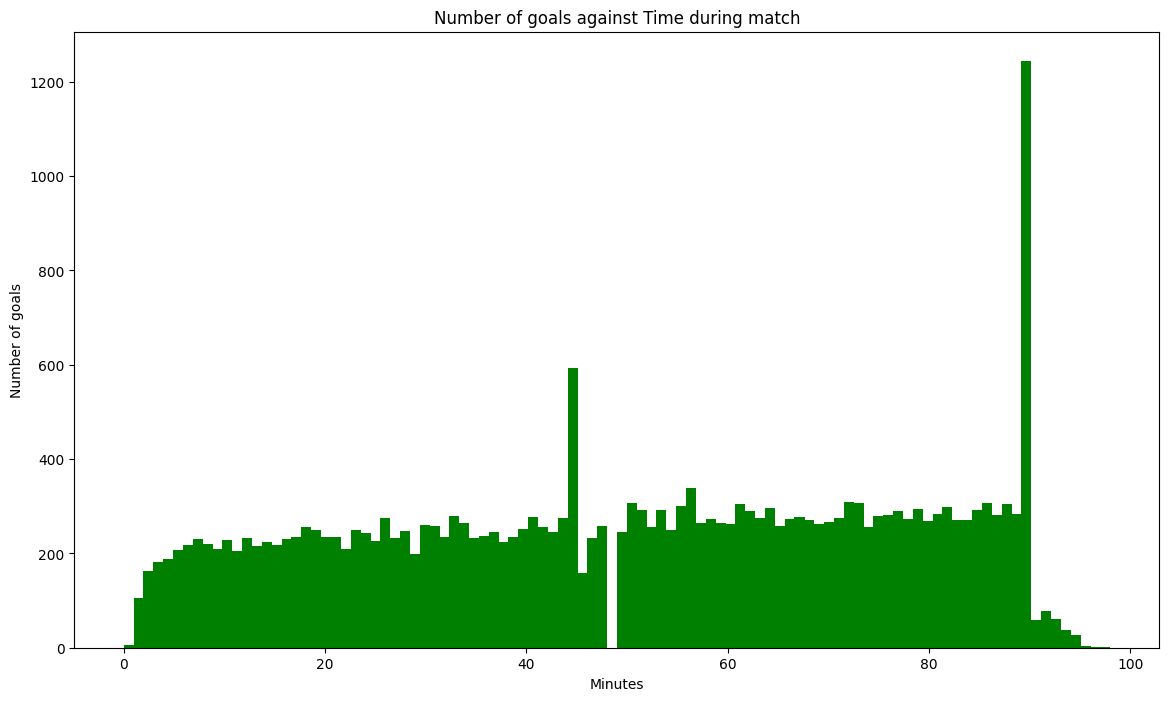

In [62]:
goals=df_events[df_events["is_goal"]==1]

fig4=plt.figure(figsize=(14,8))
plt.hist(goals.time,width=1,bins=100,color="green")   #100 so 1 bar per minute
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.title("Number of goals against Time during match")

In [84]:
## Loading events dataset
df_events1 = pd.read_csv("Dataset/events.csv")
## Loading ginf dataset, which has some important data to merge with event dataset
df_ginf1 = pd.read_csv("Dataset/ginf.csv")
## Selecting only the features I need. `id_odsp` serves as a unique identifier that will be used to 
## union the 2 datasets
## Join the 2 datasets to add 'date', 'league', 'season', and 'country' information to the main dataset
df_events1 = df_events1.merge(df_ginf1, how='left')
df_events1 = df_events1[['id_odsp', 'id_event', 'league', 'season', 'ht', 'at', 'event_team', 'is_goal']]
## Naming the leagues with their popular names.
leagues = {'E0': 'Premier League', 'SP1': 'La Liga',
          'I1': 'Serie A', 'F1': 'League One', 'D1': 'Bundesliga'}
## Apply the mapping
df_events1['league'] = df_events1['league'].map(leagues)

In [85]:
df_events1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941009 entries, 0 to 941008
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_odsp     941009 non-null  object
 1   id_event    941009 non-null  object
 2   league      941009 non-null  object
 3   season      941009 non-null  int64 
 4   ht          941009 non-null  object
 5   at          941009 non-null  object
 6   event_team  941009 non-null  object
 7   is_goal     941009 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 64.6+ MB


In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
Leagues = df_events1['league'].unique()
Seasons = list(df_events1['season'].unique())
print(Leagues)
print(Seasons)

['Bundesliga' 'League One' 'La Liga' 'Serie A' 'Premier League']
[2012, 2013, 2014, 2015, 2016, 2017]


In [88]:
df_events1[df_events1['league']== 'Bundesliga'][df_events1['season'] == 2012]['ht'].unique()

array(['Borussia Dortmund', 'FC Augsburg', 'Werder Bremen',
       'Hertha Berlin', 'FC Cologne', 'VfB Stuttgart', 'Hannover 96',
       'Mainz', 'Bayern Munich', 'Schalke 04', 'TSG Hoffenheim',
       'Nurnberg', 'SC Freiburg', 'Hamburg SV',
       'Borussia Monchengladbach', 'VfL Wolfsburg', 'Bayer Leverkusen',
       'Kaiserslautern'], dtype=object)

In [89]:
df_events1[df_events1['league']== 'Bundesliga'][df_events1['season'] == 2012][df_events['player'] == 'felipe santana']['ht'].unique()

array(['Borussia Dortmund', 'TSG Hoffenheim', 'Hannover 96',
       'Bayern Munich', 'Borussia Monchengladbach', 'SC Freiburg',
       'Schalke 04', 'Kaiserslautern'], dtype=object)